In [1]:
import os
import pandas as pd

# Define the directory where the files are stored
# Use a raw string or double backslashes
directory = r'C:\Users\husey\Desktop\msft\msmft2\computational_methods\project\datas_skewness_kurt'

# List all the CSV files in the directory
files = [file for file in os.listdir(directory) if file.startswith('kur_skew') and file.endswith('.csv')]

# Read and append all CSV files into a single DataFrame
combined_df = pd.concat([pd.read_csv(os.path.join(directory, file)) for file in files])

# Write the combined DataFrame to a new CSV file
# If you want the combined file to be saved in the same directory, provide the full path
combined_df.to_csv(os.path.join(directory, 'combined_files.csv'), index=False)



In [2]:
import pandas as pd

# Define the path to the combined CSV file
file_path = 'C:\\Users\\husey\\Desktop\\msft\\msmft2\\computational_methods\\project\\datas_skewness_kurt\\combined_files.csv'

# Read the combined CSV file
combined_df = pd.read_csv(file_path)

# Convert the date column to datetime format for sorting, inferring the datetime format
combined_df['Date'] = pd.to_datetime(combined_df['Date'], infer_datetime_format=True)

# Sort the DataFrame by the 'Date' column
combined_df_sorted = combined_df.sort_values('Date')

# Define the path for the sorted CSV file
sorted_file_path = 'C:\\Users\\husey\\Desktop\\msft\\msmft2\\computational_methods\\project\\datas_skewness_kurt\\sorted_combined_files.csv'

# Write the sorted DataFrame back to a CSV file
combined_df_sorted.to_csv(sorted_file_path, index=False)



In [3]:
import pandas as pd

# Define the path to the sorted CSV file
sorted_file_path = 'C:\\Users\\husey\\Desktop\\msft\\msmft2\\computational_methods\\project\\datas_skewness_kurt\\sorted_combined_files.csv'

# Read the sorted CSV file
sorted_df = pd.read_csv(sorted_file_path)

# Calculate the difference in 'Underlying_Price' between each row and the next row
sorted_df['Underlying_Diff'] = sorted_df['Underlying_Price'].diff().shift(-1)

# Assuming a 5-point strike grid for the SPX
strike_grid_space = 5

# Calculate the "strike move"
sorted_df['Strike_Move'] = sorted_df['Underlying_Diff'] / strike_grid_space

# Save the updated DataFrame back to a CSV file
updated_file_path = 'C:\\Users\\husey\\Desktop\\msft\\msmft2\\computational_methods\\project\\datas_skewness_kurt\\updated_combined_files.csv'
sorted_df.to_csv(updated_file_path, index=False)


PermissionError: [Errno 13] Permission denied: 'C:\\Users\\husey\\Desktop\\msft\\msmft2\\computational_methods\\project\\datas_skewness_kurt\\updated_combined_files.csv'

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the DataFrame from the CSV file
df = pd.read_csv("updated_combined_files.csv")

# Calculate and print correlation coefficients
correlation_kurtosis = df['Strike_Move'].corr(df['Kurtosis'])
correlation_skewness = df['Strike_Move'].corr(df['Skewness'])
print(f"Correlation between Strike Move and Kurtosis: {correlation_kurtosis}")
print(f"Correlation between Strike Move and Skewness: {correlation_skewness}")

# Scatter plot for Price Move vs. Kurtosis
sns.scatterplot(data=df, x='Strike_Move', y='Kurtosis')
plt.title('Price Move vs. Kurtosis')
plt.xlabel('Strike Move')
plt.ylabel('Kurtosis')
plt.show()

# Scatter plot for Price Move vs. Skewness
sns.scatterplot(data=df, x='Strike_Move', y='Skewness')
plt.title('Price Move vs. Skewness')
plt.xlabel('Strike Move')
plt.ylabel('Skewness')
plt.show()


In [ ]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# Assuming the DataFrame is loaded into 'df' and the 'Kurtosis' column exists
df = pd.read_csv("updated_combined_files.csv")

# Shapiro-Wilk Test
shapiro_results = stats.shapiro(df['Kurtosis'])
print(f"Shapiro-Wilk Test on Kurtosis: statistic={shapiro_results[0]}, p-value={shapiro_results[1]}")

# Kolmogorov-Smirnov Test
ks_results = stats.kstest(df['Kurtosis'], 'norm')
print(f"Kolmogorov-Smirnov Test on Kurtosis: statistic={ks_results[0]}, p-value={ks_results[1]}")

# Anderson-Darling Test
ad_results = stats.anderson(df['Kurtosis'], dist='norm')
print(f"Anderson-Darling Test on Kurtosis: statistic={ad_results[0]}")
for i in range(len(ad_results.critical_values)):
    sl, cv = ad_results.significance_level[i], ad_results.critical_values[i]
    if ad_results.statistic < cv:
        print(f"At the {sl}% level, we cannot reject the hypothesis that the data is normally distributed.")
    else:
        print(f"At the {sl}% level, the hypothesis of normality is rejected.")

# Histogram
plt.hist(df['Kurtosis'], bins=30, alpha=0.7, color='blue')
plt.title('Histogram of Kurtosis')
plt.show()

# Q-Q Plot
stats.probplot(df['Kurtosis'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Kurtosis')
plt.show()


In [5]:
df=pd.read_csv("updated_combined_files.csv")

In [6]:
df

,Date,Underlying_Price,Skewness,Kurtosis,Underlying_Diff,Strike_Move
0,2020-01-02,3258.14,6.386086,44.390955,-23.79,-4.758
1,2020-01-03,3234.35,2.558807,8.278562,11.88,2.376
2,2020-01-06,3246.23,5.264685,30.627258,-9.10,-1.820
3,2020-01-07,3237.13,3.573857,14.847455,16.08,3.216
4,2020-01-08,3253.21,3.500735,14.272168,21.53,4.306
...,...,...,...,...,...,...
245,2020-12-23,3689.98,4.466667,22.344765,45.58,9.116
246,2020-12-28,3735.56,2.736980,9.257057,-8.04,-1.608
247,2020-12-29,3727.52,2.320329,7.048263,4.89,0.978
248,2020-12-30,3732.41,3.149629,11.772024,23.90,4.780


In [7]:
df2=pd.read_csv("filtered_powerlaw_results.csv")

In [12]:
combined_df2 = pd.merge(df, df2, on='Date', how='inner')


In [18]:
import pandas as pd

# Assuming 'date_column' in df is already in 'YYYY-MM-DD' format
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

# Convert 'date_column' in df2 from 'MM/DD/YYYY' to datetime
df2['Date'] = pd.to_datetime(df2['Date'], format='%m/%d/%Y')


In [19]:
combined_df2 = pd.merge(df, df2, on='Date', how='inner')

In [20]:
combined_df2

,Date,Underlying_Price,Skewness,Kurtosis,Underlying_Diff,Strike_Move,date_column_x,a,xmin,date_column_y
0,2020-01-02,3258.14,6.386086,44.390955,-23.79,-4.758,2020-01-02,0.542147,1.093207e-03,2020-01-02
1,2020-01-03,3234.35,2.558807,8.278562,11.88,2.376,2020-01-03,0.581406,7.489501e-04,2020-01-03
2,2020-01-06,3246.23,5.264685,30.627258,-9.10,-1.820,2020-01-06,0.423128,4.263620e-04,2020-01-06
3,2020-01-07,3237.13,3.573857,14.847455,16.08,3.216,2020-01-07,0.131792,8.057252e-08,2020-01-07
4,2020-01-08,3253.21,3.500735,14.272168,21.53,4.306,2020-01-08,0.105223,5.936276e-09,2020-01-08
...,...,...,...,...,...,...,...,...,...,...
79,2020-12-04,3698.65,4.601673,23.780330,-6.47,-1.294,2020-12-04,0.948651,1.411722e-03,2020-12-04
80,2020-12-08,3701.93,3.361431,13.283091,-29.90,-5.980,2020-12-08,0.398209,1.528584e-04,2020-12-08
81,2020-12-09,3672.03,1.525254,3.833672,-3.92,-0.784,2020-12-09,0.353397,6.329431e-05,2020-12-09
82,2020-12-22,3687.33,2.761593,9.370783,2.65,0.530,2020-12-22,0.446648,1.342996e-04,2020-12-22


Pearson correlation: (-0.0022388447451222628, 0.9838743248843732)
Spearman correlation: SpearmanrResult(correlation=0.048456008909587935, pvalue=0.6615968832527617)
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.012
Method:                 Least Squares   F-statistic:                 0.0004110
Date:                Tue, 30 Apr 2024   Prob (F-statistic):              0.984
Time:                        01:00:32   Log-Likelihood:                -598.59
No. Observations:                  84   AIC:                             1201.
Df Residuals:                      82   BIC:                             1206.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t  

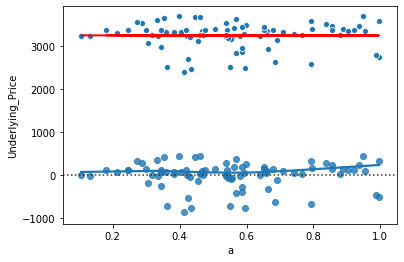

In [22]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Load your DataFrame
# df = ...
df=combined_df2
# Correlation
pearson_corr = pearsonr(df['a'], df['Underlying_Price'])
spearman_corr = spearmanr(df['a'], df['Underlying_Price'])

# Regression
X = df['a'].values.reshape(-1,1) # Predictor
y = df['Underlying_Price'].values # Response
X = sm.add_constant(X) # Adds a constant term to the predictor
est = sm.OLS(y, X).fit()

# Graphical Analysis
sns.scatterplot(x='a', y='Underlying_Price', data=df)
plt.plot(df['a'], est.fittedvalues, color='red') # Regression line

# Residual Plot
sns.residplot(x='a', y='Underlying_Price', data=df, lowess=True)

# Outputs (as an example)
print(f"Pearson correlation: {pearson_corr}")
print(f"Spearman correlation: {spearman_corr}")
print(est.summary())

plt.show()
